# Question 4

## As required we initialize bad centroids for our dataframe so we have an infinite loop to search for the best clusters

Note that we used a quite different implementation for k-means than the one in exercise 3 because we have done 2 versions!

### We create a perfect dataframe and initialize far centroids to create a "difficult" situation for k-means

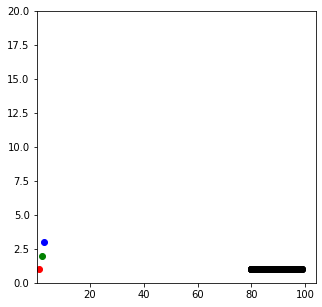

{1: [1, 1], 2: [2, 2], 3: [3, 3]}


In [17]:
import clustering_lib as cl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
%matplotlib inline

# List of channels we want to access

df = pd.DataFrame() 
c=[]
for i in range(2):
    cc=[]
    for j in range(100):
        a=0
        if i==1:
            a=1
        else:
            a=np.random.randint(80,100)
        cc.append(a)
    c.append(cc)

df = pd.DataFrame({'f1':c[0], 'f2':c[1],})# 'f3':c[2],'f4':c[3], 'f5':c[4], 'f6':c[5]})
df
k = 3

#centroids = {
   # i+1:[np.random.uniform(0,1000), np.random.uniform(19,20)] for i in range(k)
#}
centroids = {1:[1,1], 2:[2,2], 3:[3,3]}#,4:[4,4]}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['f1'], df['f2'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0.1000)
plt.ylim(0,20)
plt.show()
print(centroids)



## Now it's time to move centroids and generate clusters.... if k-means is able!

{1: [nan, nan], 2: [nan, nan], 3: [88.68, 1.0]}


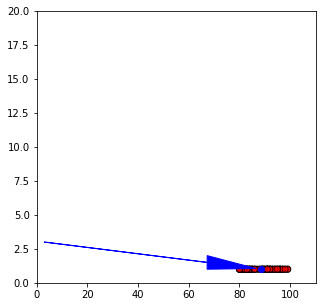

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


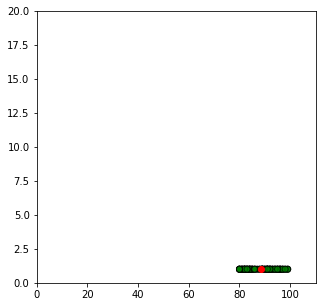

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


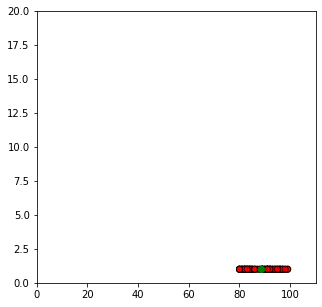

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


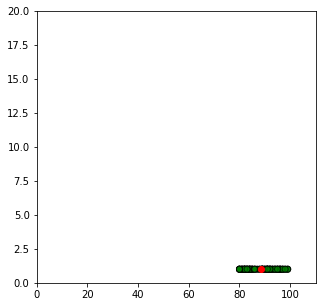

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


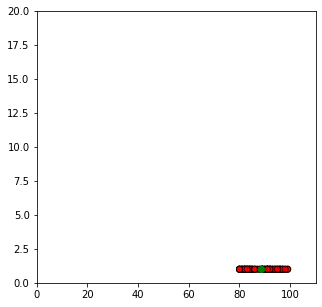

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


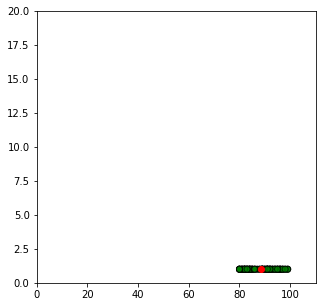

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


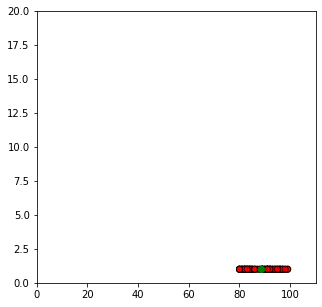

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


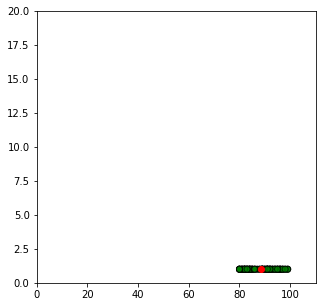

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


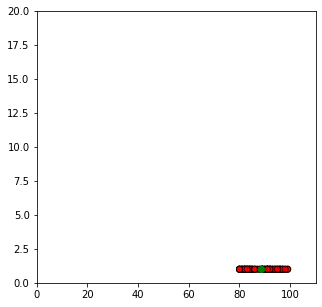

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


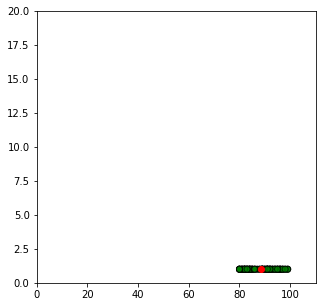

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


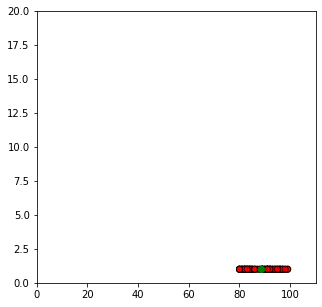

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


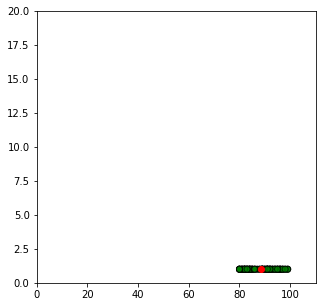

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


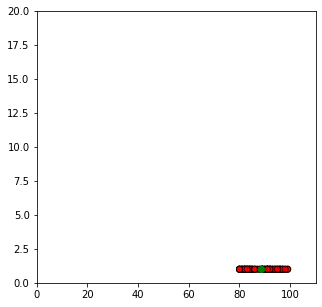

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


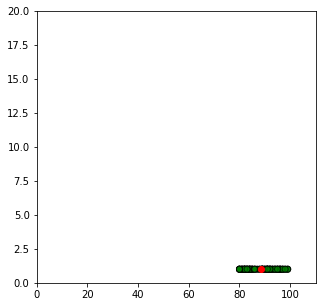

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


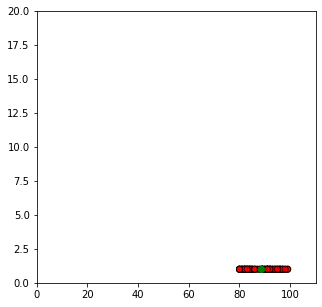

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


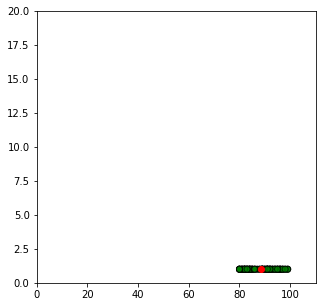

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


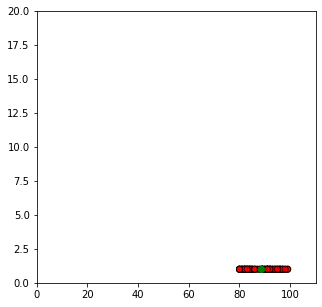

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


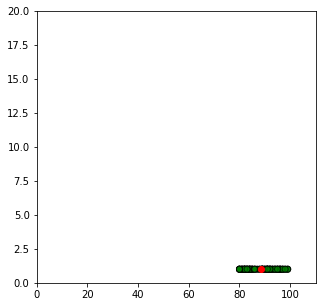

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


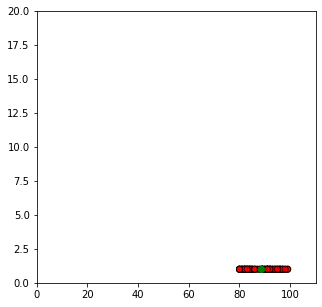

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


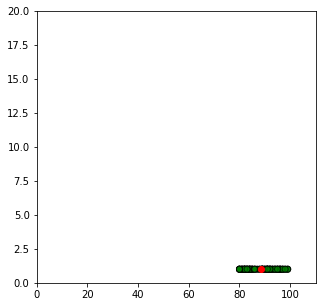

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


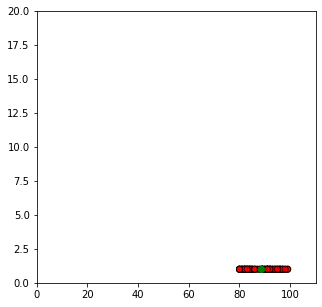

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


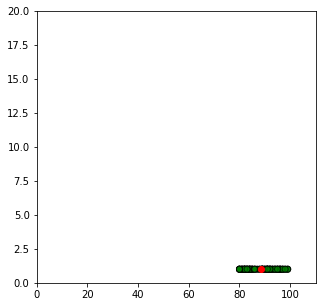

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


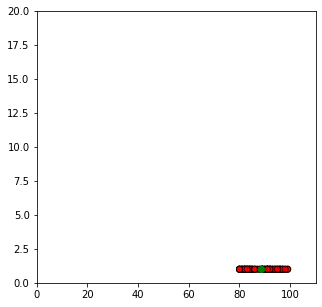

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


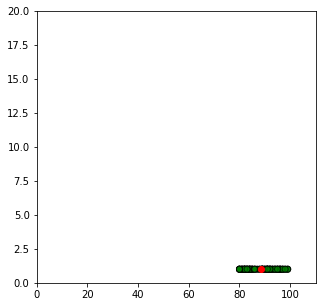

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


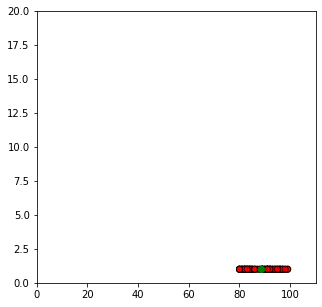

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


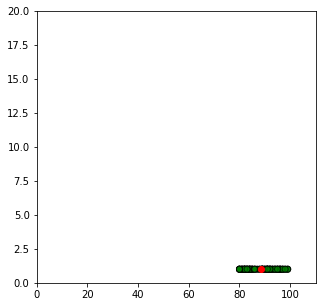

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


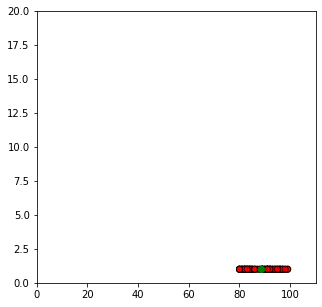

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


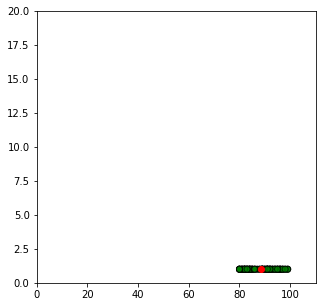

{1: [nan, nan], 2: [88.68, 1.0], 3: [nan, nan]}


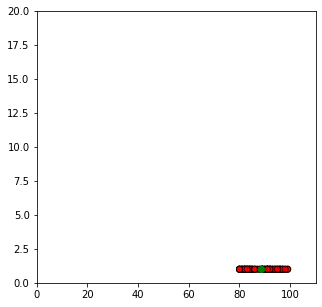

{1: [88.68, 1.0], 2: [nan, nan], 3: [nan, nan]}


KeyboardInterrupt: 

In [18]:
def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(2):
                #print(dist)
                if(centroids[h][j] == 'nan' ):
                    print('PORCAPUPAZZA')
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            #if(np.isnan(dist)):
            #        print('PORCAPUPAZZA')
            ds.append(dist)
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    df['color'] = df['clusters'].map(lambda x: colmap[x])
    return df
#put the first clusters
df = euclid(df, centroids)
df.head()

def new_centroids(df, centr, k):
    names = ['f1', 'f2']
    for i in range(1,k+1):
        for j in range(2):
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr


#o = 0
while True:
    closest_centroids = df['clusters'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = new_centroids(df, centroids, k)
    df = euclid(df, centroids)
    print(centroids)
    if closest_centroids.equals(df['clusters']):
        print('yeeeeeee')
        break   
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
    plt.scatter(df['f1'], df['f2'], alpha = 0.7, color = df['color'], edgecolor = 'k')
    for i in centroids:
        plt.scatter(*centroids[i], color = colmap[i])
    plt.xlim(0,110)
    plt.ylim(0,20)
    old = []
    for i in old_centroids.keys():
        l = []
        for j in range(0,2):
            l.append(old_centroids[i][j])
        old.append(l)
        dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
        dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
        ax.arrow(old[i-1][0], old[i-1][1], dx, dy, head_width=1, head_length=np.sqrt(dx**2+dy**2)*0.3, fc=colmap[i], ec=colmap[i])
    plt.show()

## The algorithm can't realize the right clusters and we finish in a loop! 

#### This explains that with bad initizalization k-means is not efficient and the running time could be infinite.
That's because when in Euclid we search for the minimum of a vector using np.argmin it will select nan if it's in the vector. You can ask " WHy don't you use np.nanargmin that ingores nan?" and the answer is because it would give less clusters than we want, in the case above it would give 1 cluster so the algorithm would have no use for who needs it. <br>All this happends because we gave a wrong inizialization in which we exclude some of the first centroids, because one of the hypotesis of a good k-means algorithm is an assumption of density and possible similar number of element to give at each cluster, and in this case the density is only around point 1 so the code will run indefinitely trying to set point for the centroids 2,3,4 with an impossible ending.